# Warner Bros. Discovery - Data & AI
## Box Office Take Home

Welcome to the Content Data Science & Analytics take home! 

The aim of the take home is two-fold: 
    i) provide you with a high-level insight into the types of problems that you or your future team would tackle within DAI
    ii) set a fair and constant baseline to have discussions in a panel interview
    
The focus of this take home is around how you approach problems end-to-end, and how you present your results to others in the field of the same expertise. As a result, the focus is not on the *best* solution nor the most *complicated*, but on how you can convey you approach and result. Please do not spend more than the suggested time on your solution as it will not provide you with an advantage.

Please use any language you prefer: Python, R, Jupyter Notebooks, C++, etc., as long as you can present your solutions.

Suggested time: 1 hour.

### Part 1

For this section we've provided you some historic data on the performance of movies in theatres. We ask that you build a model that can predict the box office of a title given its other associated properties. You can go in with the lens that you are presenting to other Data Scientists or Machine Learning practitioners. Please provide a description of the approach you used and why.

You were provided a file named box_office.csv, within this file you find the following columns:

* **production_cost** - the Production cost of a movie, in dollars
* **genre** - the Genre that the movie belongs to
* **year_launched** - the year the movie was launched
* **social_buzz** - social awareness and interest of the movie
* **region** - the state that the movie was first launched in
* **box_office** - the opening weekend box office of the movie, in dollars

In [1]:
import pandas as pd
df_raw = pd.read_csv('box_office.csv')

In [20]:
# Solution here
display(df_raw.describe(percentiles=[0.1,0.25,0.75,0.9]))
display(df_raw)
print(df_raw.shape)
display(df_raw.head())
# df_raw.drop_duplicates().shape
display(df_raw.groupby(by=['genre']).count())
display(df_raw.groupby(by=['year_launched']).count())
display(df_raw.groupby(by=['year_launched']).mean())
df_raw['box_office'] = df_raw['box_office'].abs()
display(df_raw.describe(percentiles=[0.1,0.25,0.75,0.9]))
# years? inflation adjusted? - number? 

,Unnamed: 0,production_cost,year_launched,box_office,social_buzz
count,500.000000,5.000000e+02,500.000000,5.000000e+02,500.000000
mean,249.500000,1.007491e+08,1992.396000,1.336060e+09,9898.123807
std,144.481833,3.718152e+07,8.725334,1.189757e+09,2563.072177
min,0.000000,1.000000e+04,1971.000000,7.697544e+05,2231.448825
10%,49.900000,5.367341e+07,1981.000000,1.647863e+08,6675.442069
25%,124.750000,7.710526e+07,1986.000000,4.541137e+08,8178.962245
50%,249.500000,1.000886e+08,1992.000000,1.001628e+09,9907.505353
75%,374.250000,1.253984e+08,1998.250000,1.886186e+09,11617.865243
90%,449.100000,1.521155e+08,2003.000000,2.865753e+09,13355.439978
max,499.000000,1.990417e+08,2020.000000,6.925767e+09,17227.272661


,Unnamed: 0,production_cost,genre,year_launched,box_office,social_buzz,region
0,0,1.411483e+08,Action,1986,3.892175e+09,11875.352377,TN
1,1,1.375681e+08,Horror,1991,9.504192e+08,14380.369857,FL
2,2,1.497820e+08,Horror,1991,1.211479e+09,10172.603266,TN
3,3,1.117145e+08,Horror,1977,1.161388e+09,9312.446168,NY
4,4,9.704355e+07,Horror,2017,2.277977e+09,13424.852190,FL
...,...,...,...,...,...,...,...
495,495,1.228305e+08,Horror,1984,1.098034e+09,8357.153820,FL
496,496,9.974783e+07,Horror,1994,2.425228e+07,6837.484887,NY
497,497,5.517232e+07,Horror,2002,1.060136e+09,8077.654385,NY
498,498,8.800150e+07,Horror,2000,1.876180e+08,8439.210007,AZ


(500, 7)


,Unnamed: 0,production_cost,genre,year_launched,box_office,social_buzz,region
0,0,1.411483e+08,Action,1986,3.892175e+09,11875.352377,TN
1,1,1.375681e+08,Horror,1991,9.504192e+08,14380.369857,FL
2,2,1.497820e+08,Horror,1991,1.211479e+09,10172.603266,TN
3,3,1.117145e+08,Horror,1977,1.161388e+09,9312.446168,NY
4,4,9.704355e+07,Horror,2017,2.277977e+09,13424.852190,FL


,Unnamed: 0,production_cost,year_launched,box_office,social_buzz,region
genre,,,,,,
Action,23,23,23,23,23,23
Animation,1,1,1,1,1,1
Documentary,39,39,39,39,39,39
Drama,108,108,108,108,108,108
Horror,250,250,250,250,250,250
Kids & Family,1,1,1,1,1,1
Sit-com,71,71,71,71,71,71
Sports,3,3,3,3,3,3
Thriller,4,4,4,4,4,4


,Unnamed: 0,production_cost,genre,box_office,social_buzz,region
year_launched,,,,,,
1971,2,2,2,2,2,2
1972,4,4,4,4,4,4
1973,2,2,2,2,2,2
1974,2,2,2,2,2,2
1975,2,2,2,2,2,2
1976,5,5,5,5,5,5
1977,7,7,7,7,7,7
1978,7,7,7,7,7,7
1979,6,6,6,6,6,6


,Unnamed: 0,production_cost,box_office,social_buzz
year_launched,,,,
1971,277.000000,9.928503e+07,2.426734e+09,10228.741125
1972,295.250000,1.046606e+08,2.599949e+09,9167.801494
1973,239.000000,1.163683e+08,2.555886e+09,11459.957028
1974,391.000000,1.235745e+08,3.135245e+09,7744.696856
1975,335.500000,1.239974e+08,2.574301e+09,8703.241544
1976,300.200000,1.105935e+08,2.167034e+09,10706.621773
1977,270.428571,1.135485e+08,1.607518e+09,9333.192630
1978,273.000000,8.709971e+07,1.158913e+09,9556.487077
1979,321.500000,9.531602e+07,1.510471e+09,9886.803802


,Unnamed: 0,production_cost,year_launched,box_office,social_buzz
count,500.000000,5.000000e+02,500.000000,5.000000e+02,500.000000
mean,249.500000,1.007491e+08,1992.396000,1.336060e+09,9898.123807
std,144.481833,3.718152e+07,8.725334,1.189757e+09,2563.072177
min,0.000000,1.000000e+04,1971.000000,7.697544e+05,2231.448825
10%,49.900000,5.367341e+07,1981.000000,1.647863e+08,6675.442069
25%,124.750000,7.710526e+07,1986.000000,4.541137e+08,8178.962245
50%,249.500000,1.000886e+08,1992.000000,1.001628e+09,9907.505353
75%,374.250000,1.253984e+08,1998.250000,1.886186e+09,11617.865243
90%,449.100000,1.521155e+08,2003.000000,2.865753e+09,13355.439978
max,499.000000,1.990417e+08,2020.000000,6.925767e+09,17227.272661


In [22]:
df_raw['year_launched_rel'] = 2023-df_raw['year_launched']
df_raw

,Unnamed: 0,production_cost,genre,year_launched,box_office,social_buzz,region,year_launched_rel
0,0,1.411483e+08,Action,1986,3.892175e+09,11875.352377,TN,37
1,1,1.375681e+08,Horror,1991,9.504192e+08,14380.369857,FL,32
2,2,1.497820e+08,Horror,1991,1.211479e+09,10172.603266,TN,32
3,3,1.117145e+08,Horror,1977,1.161388e+09,9312.446168,NY,46
4,4,9.704355e+07,Horror,2017,2.277977e+09,13424.852190,FL,6
...,...,...,...,...,...,...,...,...
495,495,1.228305e+08,Horror,1984,1.098034e+09,8357.153820,FL,39
496,496,9.974783e+07,Horror,1994,2.425228e+07,6837.484887,NY,29
497,497,5.517232e+07,Horror,2002,1.060136e+09,8077.654385,NY,21
498,498,8.800150e+07,Horror,2000,1.876180e+08,8439.210007,AZ,23


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

x = df_raw[['social_buzz','production_cost','year_launched_rel']]
y = np.log(df_raw[['box_office']])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
dtrain_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(x_test, y_test, enable_categorical=True)

MAE of the base model: 646087830.980


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,social_buzz,production_cost,year_launched_rel,box_office,box_office_pred
304,9649.505812,8.896523e+07,46,7.934195e+08,9.241372e+08
340,11384.672988,7.095696e+07,30,7.864999e+08,6.803316e+08
47,8536.793394,1.781098e+08,32,8.620098e+08,2.286655e+09
67,10841.276813,1.703941e+08,23,3.868951e+09,2.419805e+09
479,12283.461395,7.214420e+07,31,1.007095e+09,6.803316e+08


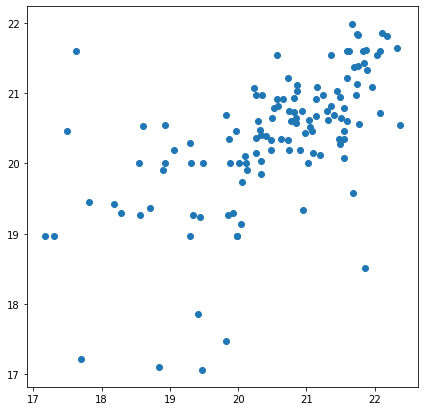

In [50]:
n = 100
params = {"booster":"gbtree",
             "objective":"reg:squarederror",
            "gamma":1}
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)
pred = model.predict(dtest_reg)
mae = mean_absolute_error(np.exp(y_test), np.exp(pred))
print(f"MAE of the base model: {mae:.3f}")

df_pred = x_test
df_pred['box_office'] = np.exp(y_test)
df_pred['box_office_pred'] = np.exp(pred)
display(df_pred.head())

import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred)
# plt.xlim(0, 5000000000)
# plt.ylim(0, 5000000000)
# plt.plot([0,5000000000], [0,5000000000], 'k-')
plt.show()

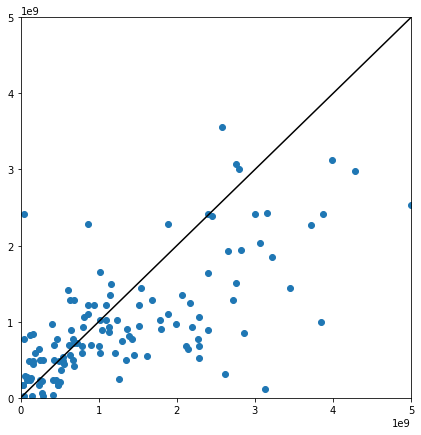

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(df_pred['box_office'], df_pred['box_office_pred'])
plt.xlim(0, 5000000000)
plt.ylim(0, 5000000000)
plt.plot([0,5000000000], [0,5000000000], 'k-')
plt.show()

### Part 2

You have been asked by a non-technical stakeholder if you can help them understand how their movie will perform when they launch it next week. They tell you it is a Horror movie that they spent $50,000,000 on producing, and will premiere in Los Angeles.

Please provide a prediction for this movie and context for why it is this value.

In [ ]:
# Solution here


### Part 3

Now that you have a model to predict box office, could you please write a repsonse to each question below:
    
    1. What other features would you have liked to have used, and why?
    2. What do we have to watch out for when we provide confidence intervals or accuracy measures for this type of model?
    3. What you need to do to make this code production level quality?

About the data
- production cost is highly correlated
- genre is also linearly related (less than production), and then has been digitized, so it'll probably smear out the results there
- year_launched is a combination of genre+production cost then adjusted to look real, so theoretically doesn't need to be in there
- social_buzz + state are just random noise

About the data
- production cost is highly correlated
- genre is also linearly related (less than production), and then has been digitized, so it'll probably smear out the results there
- year_launched is a combination of genre+production cost then adjusted to look real, so theoretically doesn't need to be in there
- social_buzz + state are just random noise

Questions 
- In addition, please provide the creative an understanding of how confident you are with this prediction.
- what would you do if target var & production cost were inflated over time? (increase over time)
- what error metric?
- imbalanced for horror movie ?
- confidence interval vs. prediction interval? 
- 